# 1. Importing the required Libraries

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
import statsmodels
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,RepeatedKFold,cross_val_predict
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor


# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn import preprocessing

# To perform scientific computations
from scipy.stats import shapiro
from scipy import stats

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = 100

# 2. Getting the Data

In [5]:
df_price=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/ProjectonPropertyPricePrediction/HousePrices.csv')
df_price.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 3. Exploratory Data Analysis

In [6]:
#dimensions of the data
df_price.shape

(2073, 81)

In [7]:
#Checking the data types
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

From the above output, we can see that 'Dwell_Type','OverallQual' and 'OverallCond' has mistakenly interpreted as int variables, so we need to convert these into object variables.

In [8]:
df_price['Dwell_Type']=df_price['Dwell_Type'].astype('O')
df_price['OverallQual']=df_price['OverallQual'].astype('O')
df_price['OverallCond']=df_price['OverallCond'].astype('O')

Dropping off the Id column as this is not required for our analysis

In [9]:
df_price.drop(['Id'],axis=1,inplace=True)

In [10]:
df_price.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
#summary statistics
df_price.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,1753.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,1960.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,72.056475,10717.853353,1969.445731,1986.617463,101.875668,437.949349,49.219489,565.101302,1052.270140,1166.096961,344.745779,6.168355,1517.011095,0.429329,0.056440,1.571635,0.378678,2.874096,1.052581,6.540280,0.602026,1980.418367,1.775687,474.683068,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,27.987475,9215.982306,30.222647,20.432694,179.169217,448.051119,165.621465,449.730940,431.026436,376.975119,438.844748,49.553967,517.236428,0.522605,0.237015,0.545963,0.499873,0.816144,0.237901,1.629673,0.633931,24.158327,0.741976,212.284955,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7620.000000,1950.000000,1970.000000,0.000000,0.000000,0.000000,208.000000,794.000000,894.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,70.000000,9492.000000,1971.000000,1995.000000,0.000000,381.000000,0.000000,466.000000,990.000000,1095.000000,0.000000,0.000000,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,83.000000,11601.000000,1999.000000,2004.000000,161.500000,708.000000,0.000000,804.000000,1291.000000,1391.000000,730.000000,0.000000,1792.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2023.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2019.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
df_price.describe(include='object')

,Dwell_Type,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2073,2073,2073,129,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2059,2073,2073,2073,2014,2014,2012,2014,2013,2073,2073,2073,2072,2073,2073,1085,1960,1960,1960,1960,2073,8,404,80,2073,2073
unique,18,5,2,2,4,4,2,5,3,25,9,8,5,8,10,9,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,722,1611,2063,72,1300,1854,2070,1481,1958,317,1794,2054,1719,1036,508,943,1606,2036,750,729,1233,1272,1815,928,904,1851,1349,604,1770,2025,1045,1935,1901,1043,1937,530,1252,857,1870,1885,1913,4,233,74,1797,1695


Since there are only 8 values for PoolQC and PoolArea also contains the area of these pools, we can drop both the variables.

In [13]:
df_price=df_price.drop(['PoolQC','PoolArea'],axis=1)

In [14]:
df_price.shape

(2073, 78)

We will treat the outliers and the missing values now.

In [15]:
#Checking for the outliers in target column

In [16]:
iqr_price=df_price.Property_Sale_Price.quantile(.75)-df_price.Property_Sale_Price.quantile(.25)
print(iqr_price)

UL=df_price.Property_Sale_Price.quantile(.75)+(1.5*iqr_price)
print(UL)

LL=df_price.Property_Sale_Price.quantile(.25)-(1.5*iqr_price)
print(LL)

84000.0
340000.0
4000.0


In [17]:
UL_outliers=df_price.loc[df_price.Property_Sale_Price>UL,['Property_Sale_Price']]
UL_outliers.Property_Sale_Price.count()

78

In [18]:
LL_outliers=df_price.loc[df_price.Property_Sale_Price<LL,['Property_Sale_Price']]
LL_outliers.Property_Sale_Price.count()

0

We will replace the UL outliers with the UL value.

In [19]:
df_price.loc[(df_price.Property_Sale_Price>UL),'Property_Sale_Price']=UL

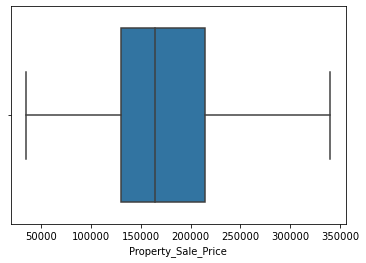

In [20]:
sns.boxplot(x='Property_Sale_Price',data=df_price)
plt.show()

There are no outliers in the target column now.

In [21]:
#Missing Value Counts

In [22]:
miss_value=df_price.isnull().sum()
df_miss_value=pd.DataFrame()
df_miss_value['Values']=miss_value[miss_value>0]
df_miss_value['Percentage']=((miss_value[miss_value>0]/len(miss_value[miss_value>0])*100)).round(2)
df_miss_value['Data_Type']=df_price[df_miss_value.index].dtypes
df_miss_value.sort_values('Values',ascending=False)

,Values,Percentage,Data_Type
MiscFeature,1993,11072.22,object
Alley,1944,10800.00,object
Fence,1669,9272.22,object
FireplaceQu,988,5488.89,object
LotFrontage,320,1777.78,float64
GarageType,113,627.78,object
GarageYrBlt,113,627.78,float64
GarageFinish,113,627.78,object
GarageQual,113,627.78,object
GarageCond,113,627.78,object


In [23]:
print('Total number of missing value columns: {}'.format(len(df_miss_value)))

Total number of missing value columns: 18


In [24]:
#Separating the numerical and categorical missing value columns and treating them

In [25]:
#Categorical Missing Value Columns

In [26]:
cat_miss_values=df_miss_value[df_miss_value.Data_Type=='object']
cat_miss_values.sort_values('Values',ascending=False)

,Values,Percentage,Data_Type
MiscFeature,1993,11072.22,object
Alley,1944,10800.00,object
Fence,1669,9272.22,object
FireplaceQu,988,5488.89,object
GarageType,113,627.78,object
GarageFinish,113,627.78,object
GarageQual,113,627.78,object
GarageCond,113,627.78,object
BsmtExposure,61,338.89,object
BsmtFinType2,60,333.33,object


In [27]:
#Filling the null values in MiscFeature column with none value
df_price['MiscFeature']=df_price['MiscFeature'].fillna('None')

In [28]:
#Filling the null values in Alley,Fence,FireplaceQu column with No Alley,No Fence,No Fireplace
df_price['Alley']=df_price['Alley'].fillna('No Alley')
df_price['Fence']=df_price['Fence'].fillna('No Fence')
df_price['FireplaceQu']=df_price['FireplaceQu'].fillna('No Fireplace')

In [29]:
#Filling the null values in GarageType,GarageFinish,GarageQual,GarageCond column with No Garage

cols=['GarageType','GarageFinish','GarageQual','GarageCond']
for col in cols:
    df_price[col].fillna('No Garage',inplace=True)

In [30]:
#Filling the null values in BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1 column with No Basement

cols=['BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1']
for col in cols:
    df_price[col].fillna('No Basement',inplace=True)

In [31]:
#Filling the null values in MasVnrType column with none value
df_price['MasVnrType']=df_price['MasVnrType'].fillna('None')

In [32]:
#Filling the null values in Electrical column with its mode value
df_price['Electrical']=df_price['Electrical'].fillna(df_price['Electrical'].mode()[0])

In [33]:
#Numerical Missing Value Columns

In [34]:
num_miss_values=df_miss_value[df_miss_value.Data_Type!='object']
num_miss_values.sort_values('Values',ascending=False)

,Values,Percentage,Data_Type
LotFrontage,320,1777.78,float64
GarageYrBlt,113,627.78,float64
MasVnrArea,14,77.78,float64


In [35]:
#Filling the null values in LotFrontage column with its median value
df_price['LotFrontage']=df_price['LotFrontage'].fillna(df_price['LotFrontage'].median())

In [36]:
#Filling the null values in GarageYrBlt with 0 stating there are no Garages.
df_price['GarageYrBlt']=df_price['GarageYrBlt'].fillna(0)

In [37]:
df_price['MasVnrArea'].median()

0.0

Since the median value is 0, we will first check the corresponding MasVnrArea value based on the Dwell_Type.

In [38]:
df_mva_missing=df_price.loc[df_price.MasVnrArea.isnull(),['MasVnrArea','Dwell_Type']]
df_mva_missing

,MasVnrArea,Dwell_Type
234,NaN,60
529,NaN,20
650,NaN,60
936,NaN,20
973,NaN,20
977,NaN,120
1243,NaN,20
1278,NaN,60
1520,NaN,20
1524,NaN,120


In [39]:
df1=df_price.groupby('Dwell_Type')['MasVnrArea'].median().round(2)
df1

Dwell_Type
20        0.0
30        0.0
40        0.0
45        0.0
50        0.0
60       92.0
70        0.0
75        0.0
80       43.5
85        0.0
90        0.0
120      66.0
150      28.0
160      42.0
180       0.0
190       0.0
303     640.0
7080      0.0
Name: MasVnrArea, dtype: float64

In [40]:
df_price.loc[df_mva_missing.index,'MasVnrArea']=df_price.loc[df_mva_missing.index,'Dwell_Type'].apply(lambda x:df1.loc[x])

In [41]:
#Checking for the missing value counts now.
df_price.isnull().sum()

Dwell_Type             0
Zone_Class             0
LotFrontage            0
LotArea                0
Road_Type              0
Alley                  0
Property_Shape         0
LandContour            0
Utilities              0
LotConfig              0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
Dwelling_Type          0
HouseStyle             0
OverallQual            0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
RoofStyle              0
RoofMatl               0
Exterior1st            0
Exterior2nd            0
MasVnrType             0
MasVnrArea             0
ExterQual              0
ExterCond              0
Foundation             0
BsmtQual               0
BsmtCond               0
BsmtExposure           0
BsmtFinType1           0
BsmtFinSF1             0
BsmtFinType2           0
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
Heating                0
HeatingQC              0


In [42]:
#Checking the target column for distribution

In [43]:
df_price.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,No Fence,None,0,12,2008,WD,Normal,250000


In [44]:
df_price['Property_Sale_Price'].skew()

0.7881216545326494

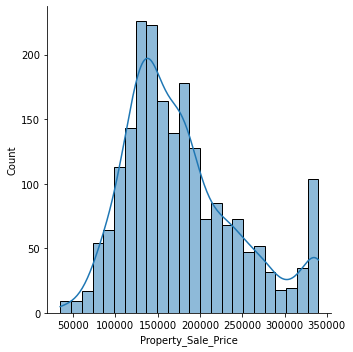

In [45]:
sns.displot(x='Property_Sale_Price',data=df_price,kde=True)
plt.show()

The data is slightly positively skewed.We can check reducing the skewness by normalising it.

In [46]:
df_price['log_Property_Sale_Price']=np.log(df_price['Property_Sale_Price'])

In [47]:
df_price.head()    #Checking for the log column

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,log_Property_Sale_Price
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,No Fence,None,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,No Fence,None,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,No Fence,None,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,No Fence,None,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,No Fence,None,0,12,2008,WD,Normal,250000,12.429216


In [48]:
#Creating a backup file
df_price1=df_price.copy()
df_price1

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,log_Property_Sale_Price
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,No Fence,None,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,No Fence,None,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,No Fence,None,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,No Fence,None,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,No Fence,None,0,12,2008,WD,Normal,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,60,RL,70.0,8755,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,RRNn,Norm,1Fam,2Story,8,4,1936,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,298.0,Gd,TA,PConc,Gd,TA,No,ALQ,772,Unf,0,220,992,GasA,Ex,Y,SBrkr,1022,1038,0,2060,1,0,2,1,3,1,Gd,8,Typ,1,TA,BuiltIn,1999.0,RFn,2,390,TA,TA,Y,0,0,0,168,0,GdPrv,None,0,6,2009,WD,Normal,214000,12.273731
2069,90,RL,63.0,7711,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,6,9,1936,1977,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,1440,Unf,0,0,1440,GasA,TA,Y,SBrkr,1440,0,0,1440,2,0,2,0,4,2,TA,8,Typ,0,No Fireplace,No Garage,0.0,No Garage,0,0,No Garage,No Garage,N,321,0,0,0,0,No Fence,None,0,8,2007,Oth,Abnorml,150000,11.918391
2070,90,RL,313.0,25000,Pave,No Alley,Reg,Low,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1Story,4,6,1983,1996,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,1632,1632,GasA,TA,Y,SBrkr,1632,0,0,1632,0,0,2,0,4,2,TA,8,Typ,0,No Fireplace,Attchd,2017.0,Unf,2,576,TA,TA,P,0,0,0,0,0,No Fence,None,0,6,2007,WD,Normal,143000,11.870600
2071,20,RL,52.0,14375,Pave,No 

In [49]:
df_price['log_Property_Sale_Price'].skew()

-0.22636253248598062

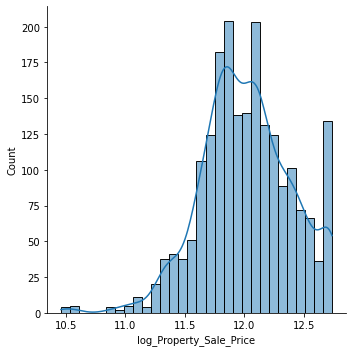

In [50]:
sns.displot(x='log_Property_Sale_Price',data=df_price,kde=True)
plt.show()

The data is slightly negatively skewed.

In [51]:
#Separating the numerical and categorical columns.

In [52]:
num_features=df_price.select_dtypes(include=np.number)
num_features.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price', 'log_Property_Sale_Price'],
      dtype='object')

In [53]:
cat_features=df_price.select_dtypes(include=object)
cat_features.columns

Index(['Dwell_Type', 'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [54]:
#Dummy encoding the categorical variables

In [55]:
df_price_dummy=pd.get_dummies(df_price,drop_first=True)
df_price_dummy.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No Alley,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_Bu

In [56]:
df_price_dummy.shape

(2073, 288)

# 3. Model Building and Testing the Accuracy

In [57]:
#Adding the intercept column
df_price_dummy=sm.add_constant(df_price_dummy)
df_price_dummy.head()

,const,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No Alley,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageT

In [58]:
#Separating the dependent and independent variables
X=df_price_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'],axis=1)
y=df_price_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

print('The shape of X_train is: ',X_train.shape)
print('The shape of X_test is: ',X_test.shape)
print('The shape of y_train is: ',y_train.shape)
print('The shape of y_test is: ',y_test.shape)

The shape of X_train is:  (1554, 287)
The shape of X_test is:  (519, 287)
The shape of y_train is:  (1554, 2)
The shape of y_test is:  (519, 2)


## 1.OLS model with Property Sale Price as target Variable

In [59]:
#Model Building
OLS_model_with_Price=sm.OLS(y_train['Property_Sale_Price'],X_train).fit()
print(OLS_model_with_Price.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.938
Model:                             OLS   Adj. R-squared:                  0.925
Method:                  Least Squares   F-statistic:                     72.13
Date:                 Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                         19:53:22   Log-Likelihood:                -17292.
No. Observations:                 1554   AIC:                         3.513e+04
Df Residuals:                     1283   BIC:                         3.658e+04
Df Model:                          270                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

In [60]:
#Predicting the results with test set
pred_values=OLS_model_with_Price.predict(X_test)
actual_values=y_test['Property_Sale_Price']

In [61]:
#Computing the accuracy measures
OLS_model_with_Price_rmse=rmse(pred_values,actual_values)
print('OLS_model_with_Price_rmse: ',OLS_model_with_Price_rmse)

OLS_model_with_Price_rsquared=OLS_model_with_Price.rsquared
print('OLS_model_with_Price_rsquared: ',OLS_model_with_Price_rsquared)

OLS_model_with_Price_rsquared_adj=OLS_model_with_Price.rsquared_adj
print('OLS_model_with_Price_rsquared_adj: ',OLS_model_with_Price_rsquared_adj)

OLS_model_with_Price_rmse:  27604.12860962075
OLS_model_with_Price_rsquared:  0.9381890773365714
OLS_model_with_Price_rsquared_adj:  0.9251813227620385


In [62]:
#Tabulating the results
cols=['Model','RMSE','RSquared','RSquared_Adj']

result=pd.DataFrame(columns=cols)

OLS_model_with_Price_metrics=pd.Series({'Model':'OLS_model_with_Price',
                                          'RMSE':OLS_model_with_Price_rmse,
                                          'RSquared':OLS_model_with_Price_rsquared,
                                          'RSquared_Adj':OLS_model_with_Price_rsquared_adj})

result=result.append(OLS_model_with_Price_metrics,ignore_index=True)
result

,Model,RMSE,RSquared,RSquared_Adj
0,OLS_model_with_Price,27604.12861,0.938189,0.925181


## 2. OLS model with log Property Sale Price as target Variable

In [63]:
#Model Building
OLS_model_with_log_Price=sm.OLS(y_train['log_Property_Sale_Price'],X_train).fit()
print(OLS_model_with_log_Price.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.933
Model:                                 OLS   Adj. R-squared:                  0.919
Method:                      Least Squares   F-statistic:                     66.04
Date:                     Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                             19:53:22   Log-Likelihood:                 1419.9
No. Observations:                     1554   AIC:                            -2298.
Df Residuals:                         1283   BIC:                            -848.3
Df Model:                              270                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [64]:
#Predicting the results with test set
pred_values=OLS_model_with_log_Price.predict(X_test)
predicted_values=np.exp(pred_values)
actual_values=y_test['Property_Sale_Price']

In [65]:
#Computing the accuracy measures
OLS_model_with_log_Price_rmse=rmse(predicted_values,actual_values)
print('OLS_model_with_log_Price_rmse: ',OLS_model_with_log_Price_rmse)

OLS_model_with_log_Price_rsquared=OLS_model_with_log_Price.rsquared
print('OLS_model_with_log_Price_rsquared: ',OLS_model_with_log_Price_rsquared)

OLS_model_with_log_Price_rsquared_adj=OLS_model_with_log_Price.rsquared_adj
print('OLS_model_with_log_Price_rsquared_adj: ',OLS_model_with_log_Price_rsquared_adj)

OLS_model_with_log_Price_rmse:  26117.378735633312
OLS_model_with_log_Price_rsquared:  0.9328787143692284
OLS_model_with_log_Price_rsquared_adj:  0.9187534243300169


In [66]:
#Tabulating the results
OLS_model_with_log_Price_metrics=pd.Series({'Model':'OLS_model_with_log_Price',
                                          'RMSE':OLS_model_with_log_Price_rmse,
                                          'RSquared':OLS_model_with_log_Price_rsquared,
                                          'RSquared_Adj':OLS_model_with_log_Price_rsquared_adj})

result=result.append(OLS_model_with_log_Price_metrics,ignore_index=True)
result

,Model,RMSE,RSquared,RSquared_Adj
0,OLS_model_with_Price,27604.12861,0.938189,0.925181
1,OLS_model_with_log_Price,26117.378736,0.932879,0.918753


# Feature Engineering 1

In [67]:
df_price.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,log_Property_Sale_Price
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,No Fence,None,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,No Fence,None,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,No Fence,None,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,No Fence,None,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,No Fence,None,0,12,2008,WD,Normal,250000,12.429216


In [68]:
#Creating a new feature by using variables 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', and 'GrLivArea'
df_price['TotalBsmtSF']=df_price['BsmtFinSF1']+df_price['BsmtFinSF2']+df_price['BsmtUnfSF']

df_price['TotalSF']=df_price['TotalBsmtSF']+df_price['1stFlrSF']+df_price['2ndFlrSF']+df_price['GrLivArea']

#Now we will drop the variables which are not required since we already created an aggregated column for these variables.
df_price=df_price.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea'],axis=1)

In [69]:
df_price.shape

(2073, 73)

In [70]:
#separating the numerical and categorical columns
num_features1=df_price.select_dtypes(include=np.number)
print(num_features1.columns)

cat_features1=df_price.select_dtypes(include=object)
print(cat_features1.columns)

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'Property_Sale_Price', 'log_Property_Sale_Price', 'TotalSF'],
      dtype='object')
Index(['Dwell_Type', 'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',

In [71]:
#dummy encoding the categorical variables

df_price_dummy=pd.get_dummies(df_price,drop_first=True)
df_price_dummy.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price,TotalSF,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No Alley,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,

In [72]:
#Adding intercept to the data
df_price_dummy=sm.add_constant(df_price_dummy)

In [73]:
#Separating the dependent and independent variables
X=df_price_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'],axis=1)
y=df_price_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

print('The shape of X_train is: ',X_train.shape)
print('The shape of X_test is: ',X_test.shape)
print('The shape of y_train is: ',y_train.shape)
print('The shape of y_test is: ',y_test.shape)

The shape of X_train is:  (1554, 281)
The shape of X_test is:  (519, 281)
The shape of y_train is:  (1554, 2)
The shape of y_test is:  (519, 2)


## 3. OLS model with FeatureEngineering1 and price as target variable

In [74]:
#Model Building
OLS_model_with_feature1_Price=sm.OLS(y_train['Property_Sale_Price'],X_train).fit()
print(OLS_model_with_feature1_Price.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.937
Model:                             OLS   Adj. R-squared:                  0.924
Method:                  Least Squares   F-statistic:                     72.03
Date:                 Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                         19:53:23   Log-Likelihood:                -17306.
No. Observations:                 1554   AIC:                         3.515e+04
Df Residuals:                     1287   BIC:                         3.657e+04
Df Model:                          266                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

In [75]:
#Predicting the results with test set
pred_values=OLS_model_with_feature1_Price.predict(X_test)
actual_values=y_test['Property_Sale_Price']

In [76]:
#Computing the accuracy measures
OLS_model_with_feature1_Price_rmse=rmse(pred_values,actual_values)
print('OLS_model_with_feature1_Price_rmse: ',OLS_model_with_feature1_Price_rmse)

OLS_model_with_feature1_Price_rsquared=OLS_model_with_feature1_Price.rsquared
print('OLS_model_with_feature1_Price_rsquared: ',OLS_model_with_feature1_Price_rsquared)

OLS_model_with_feature1_Price_rsquared_adj=OLS_model_with_feature1_Price.rsquared_adj
print('OLS_model_with_feature1_Price_rsquared_adj: ',OLS_model_with_feature1_Price_rsquared_adj)

OLS_model_with_feature1_Price_rmse:  27161.6075405178
OLS_model_with_feature1_Price_rsquared:  0.9370526935522964
OLS_model_with_feature1_Price_rsquared_adj:  0.9240426053509839


In [77]:
#Tabulating the results
OLS_model_with_feature1_Price_metrics=pd.Series({'Model':'OLS_model_with_feature1_Price',
                                          'RMSE':OLS_model_with_feature1_Price_rmse,
                                          'RSquared':OLS_model_with_feature1_Price_rsquared,
                                          'RSquared_Adj':OLS_model_with_feature1_Price_rsquared_adj})

result=result.append(OLS_model_with_feature1_Price_metrics,ignore_index=True)
result

,Model,RMSE,RSquared,RSquared_Adj
0,OLS_model_with_Price,27604.12861,0.938189,0.925181
1,OLS_model_with_log_Price,26117.378736,0.932879,0.918753
2,OLS_model_with_feature1_Price,27161.607541,0.937053,0.924043


## 4. OLS model with FeatureEngineering1 and log price as target variable

In [78]:
#Model Building
OLS_model_with_feature1_log_Price=sm.OLS(y_train['log_Property_Sale_Price'],X_train).fit()
print(OLS_model_with_feature1_log_Price.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.933
Model:                                 OLS   Adj. R-squared:                  0.919
Method:                      Least Squares   F-statistic:                     66.86
Date:                     Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                             19:53:23   Log-Likelihood:                 1415.8
No. Observations:                     1554   AIC:                            -2298.
Df Residuals:                         1287   BIC:                            -869.5
Df Model:                              266                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [79]:
#Predicting the results with test set
pred_values=OLS_model_with_feature1_log_Price.predict(X_test)
predicted_values=np.exp(pred_values)
actual_values=y_test['Property_Sale_Price']

In [80]:
#Computing the accuracy measures
OLS_model_with_feature1_log_Price_rmse=rmse(predicted_values,actual_values)
print('OLS_model_with_feature1_log_Price_rmse: ',OLS_model_with_feature1_log_Price_rmse)

OLS_model_with_feature1_log_Price_rsquared=OLS_model_with_feature1_log_Price.rsquared
print('OLS_model_with_feature1_log_Price_rsquared: ',OLS_model_with_feature1_log_Price_rsquared)

OLS_model_with_feature1_log_Price_rsquared_adj=OLS_model_with_feature1_log_Price.rsquared_adj
print('OLS_model_with_feature1_log_Price_rsquared_adj: ',OLS_model_with_feature1_log_Price_rsquared_adj)

OLS_model_with_feature1_log_Price_rmse:  25436.663441101224
OLS_model_with_feature1_log_Price_rsquared:  0.9325209584072437
OLS_model_with_feature1_log_Price_rsquared_adj:  0.9185742411860525


In [81]:
#Tabulating the results
OLS_model_with_feature1_log_Price_metrics=pd.Series({'Model':'OLS_model_with_feature1_log_Price',
                                          'RMSE':OLS_model_with_feature1_log_Price_rmse,
                                          'RSquared':OLS_model_with_feature1_log_Price_rsquared,
                                          'RSquared_Adj':OLS_model_with_feature1_log_Price_rsquared_adj})

result=result.append(OLS_model_with_feature1_log_Price_metrics,ignore_index=True)
result

,Model,RMSE,RSquared,RSquared_Adj
0,OLS_model_with_Price,27604.12861,0.938189,0.925181
1,OLS_model_with_log_Price,26117.378736,0.932879,0.918753
2,OLS_model_with_feature1_Price,27161.607541,0.937053,0.924043
3,OLS_model_with_feature1_log_Price,25436.663441,0.932521,0.918574


# Feature Engineering 2

In [82]:
df_price.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,log_Property_Sale_Price,TotalSF
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,No Fence,None,0,2,2008,WD,Normal,208500,12.247694,4276
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,No Fence,None,0,5,2007,WD,Normal,181500,12.109011,3786
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,No Fence,None,0,9,2008,WD,Normal,223500,12.317167,4492
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,No Fence,None,0,2,2006,WD,Abnorml,140000,11.849398,4190
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,No Fence,None,0,12,2008,WD,Normal,250000,12.429216,5541


In [83]:
#Creating a new feature by using variables 'BuildingAge','RemodelAge'

In [84]:
import datetime as dt
current_year=int(dt.datetime.now().year)
print(current_year)

2022


In [85]:
df_price['BuildingAge']=current_year-df_price['YearBuilt']
df_price['RemodelAge']=current_year-df_price['YearRemodAdd']

df_price=df_price.drop(['YearBuilt','YearRemodAdd'],axis=1)

In [86]:
df_price.head()   #Checking for the newly added features

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,log_Property_Sale_Price,TotalSF,BuildingAge,RemodelAge
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,No Fence,None,0,2,2008,WD,Normal,208500,12.247694,4276,19,19
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,No Fence,None,0,5,2007,WD,Normal,181500,12.109011,3786,46,46
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,No Fence,None,0,9,2008,WD,Normal,223500,12.317167,4492,21,20
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,No Fence,None,0,2,2006,WD,Abnorml,140000,11.849398,4190,107,52
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,No Fence,None,0,12,2008,WD,Normal,250000,12.429216,5541,22,22


In [87]:
#Separating the numerical and categorical features

num_features=df_price.select_dtypes(include=np.number)
print(num_features.columns)

cat_features=df_price.select_dtypes(include=object)
print(cat_features.columns)

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price',
       'log_Property_Sale_Price', 'TotalSF', 'BuildingAge', 'RemodelAge'],
      dtype='object')
Index(['Dwell_Type', 'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',

In [88]:
#dummy encoding the categorical features

df_price_dummy=pd.get_dummies(df_price,drop_first=True)
df_price_dummy.head()

,LotFrontage,LotArea,MasVnrArea,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price,TotalSF,BuildingAge,RemodelAge,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No Alley,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,

In [89]:
#Adding intercept to the data
df_price_dummy=sm.add_constant(df_price_dummy)

In [90]:
#Spliting the independent and dependent variable

X=df_price_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'],axis=1)
y=df_price_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

print('The shape of X_train is: ',X_train.shape)
print('The shape of X_test is: ',X_test.shape)
print('The shape of y_train is: ',y_train.shape)
print('The shape of y_test is: ',y_test.shape)

The shape of X_train is:  (1554, 281)
The shape of X_test is:  (519, 281)
The shape of y_train is:  (1554, 2)
The shape of y_test is:  (519, 2)


## 5. OLS model with Feature Engineering 2 and Price as target variable

In [91]:
#Model Building
OLS_model_with_feature2_Price=sm.OLS(y_train['Property_Sale_Price'],X_train).fit()
print(OLS_model_with_feature2_Price.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.937
Model:                             OLS   Adj. R-squared:                  0.924
Method:                  Least Squares   F-statistic:                     72.03
Date:                 Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                         19:53:23   Log-Likelihood:                -17306.
No. Observations:                 1554   AIC:                         3.515e+04
Df Residuals:                     1287   BIC:                         3.657e+04
Df Model:                          266                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

In [92]:
#Predicting the results with test set
pred_values=OLS_model_with_feature2_Price.predict(X_test)
actual_values=y_test['Property_Sale_Price']

In [93]:
#Computing the accuracy measures
OLS_model_with_feature2_Price_rmse=rmse(pred_values,actual_values)
print('OLS_model_with_feature2_Price_rmse: ',OLS_model_with_feature2_Price_rmse)

OLS_model_with_feature2_Price_rsquared=OLS_model_with_feature2_Price.rsquared
print('OLS_model_with_feature2_Price_rsquared: ',OLS_model_with_feature2_Price_rsquared)

OLS_model_with_feature2_Price_rsquared_adj=OLS_model_with_feature2_Price.rsquared_adj
print('OLS_model_with_feature2_Price_rsquared_adj: ',OLS_model_with_feature2_Price_rsquared_adj)

OLS_model_with_feature2_Price_rmse:  25765.638281683336
OLS_model_with_feature2_Price_rsquared:  0.9370526935522964
OLS_model_with_feature2_Price_rsquared_adj:  0.9240426053509839


In [94]:
#Tabulating the results
OLS_model_with_feature2_Price_metrics=pd.Series({'Model':'OLS_model_with_feature2_Price',
                                          'RMSE':OLS_model_with_feature2_Price_rmse,
                                          'RSquared':OLS_model_with_feature2_Price_rsquared,
                                          'RSquared_Adj':OLS_model_with_feature2_Price_rsquared_adj})

result=result.append(OLS_model_with_feature2_Price_metrics,ignore_index=True)
result

,Model,RMSE,RSquared,RSquared_Adj
0,OLS_model_with_Price,27604.12861,0.938189,0.925181
1,OLS_model_with_log_Price,26117.378736,0.932879,0.918753
2,OLS_model_with_feature1_Price,27161.607541,0.937053,0.924043
3,OLS_model_with_feature1_log_Price,25436.663441,0.932521,0.918574
4,OLS_model_with_feature2_Price,25765.638282,0.937053,0.924043


## 6. OLS model with Feature Engineering 2 and log Price as target variable

In [95]:
#Model Building
OLS_model_with_feature2_log_Price=sm.OLS(y_train['log_Property_Sale_Price'],X_train).fit()
print(OLS_model_with_feature2_log_Price.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.933
Model:                                 OLS   Adj. R-squared:                  0.919
Method:                      Least Squares   F-statistic:                     66.86
Date:                     Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                             19:53:24   Log-Likelihood:                 1415.8
No. Observations:                     1554   AIC:                            -2298.
Df Residuals:                         1287   BIC:                            -869.5
Df Model:                              266                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [96]:
#Predicting the results with test set
pred_values=OLS_model_with_feature2_log_Price.predict(X_test)
predicted_values=np.exp(pred_values)
actual_values=y_test['Property_Sale_Price']

In [97]:
#Computing the accuracy measures
OLS_model_with_feature2_log_Price_rmse=rmse(predicted_values,actual_values)
print('OLS_model_with_feature2_log_Price_rmse: ',OLS_model_with_feature2_log_Price_rmse)

OLS_model_with_feature2_log_Price_rsquared=OLS_model_with_feature2_log_Price.rsquared
print('OLS_model_with_feature2_log_Price_rsquared: ',OLS_model_with_feature2_log_Price_rsquared)

OLS_model_with_feature2_log_Price_rsquared_adj=OLS_model_with_feature2_log_Price.rsquared_adj
print('OLS_model_with_feature2_log_Price_rsquared_adj: ',OLS_model_with_feature2_log_Price_rsquared_adj)

OLS_model_with_feature2_log_Price_rmse:  25032.211384628525
OLS_model_with_feature2_log_Price_rsquared:  0.9325209584072436
OLS_model_with_feature2_log_Price_rsquared_adj:  0.9185742411860522


In [98]:
#Tabulating the results
OLS_model_with_feature2_log_Price_metrics=pd.Series({'Model':'OLS_model_with_feature2_log_Price',
                                          'RMSE':OLS_model_with_feature2_log_Price_rmse,
                                          'RSquared':OLS_model_with_feature2_log_Price_rsquared,
                                          'RSquared_Adj':OLS_model_with_feature2_log_Price_rsquared_adj})

result=result.append(OLS_model_with_feature2_log_Price_metrics,ignore_index=True)
result

,Model,RMSE,RSquared,RSquared_Adj
0,OLS_model_with_Price,27604.12861,0.938189,0.925181
1,OLS_model_with_log_Price,26117.378736,0.932879,0.918753
2,OLS_model_with_feature1_Price,27161.607541,0.937053,0.924043
3,OLS_model_with_feature1_log_Price,25436.663441,0.932521,0.918574
4,OLS_model_with_feature2_Price,25765.638282,0.937053,0.924043
5,OLS_model_with_feature2_log_Price,25032.211385,0.932521,0.918574


# Feature Selection

In [99]:
#We will calculate VIF for each numerical variable.

In [100]:
df_price_features=df_price.drop(['Property_Sale_Price','log_Property_Sale_Price'],axis=1)

num_features_vif=df_price_features.select_dtypes(include=np.number)

num_features_vif.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'TotalSF', 'BuildingAge',
       'RemodelAge'],
      dtype='object')

In [101]:
vif=pd.DataFrame()

vif['Value']=[variance_inflation_factor(num_features_vif.values,i) for i in range(num_features_vif.shape[1])]
vif['Features']=num_features_vif.columns

vif.sort_values('Value',ascending=False).reset_index(drop=True)

,Value,Features
0,77.312758,YrSold
1,71.798451,TotRmsAbvGrd
2,50.648579,TotalSF
3,38.751021,GarageCars
4,33.257271,GarageYrBlt
5,31.144566,GarageArea
6,28.758167,BedroomAbvGr
7,27.863054,KitchenAbvGr
8,21.645033,FullBath
9,10.598507,LotFrontage


In [102]:
#We will drop the features with VIF value greater than 10.

vif_more_than_10=vif[vif['Value']>10]

print(vif_more_than_10)

        Value      Features
0   10.598507   LotFrontage
6   21.645033      FullBath
8   28.758167  BedroomAbvGr
9   27.863054  KitchenAbvGr
10  71.798451  TotRmsAbvGrd
12  33.257271   GarageYrBlt
13  38.751021    GarageCars
14  31.144566    GarageArea
22  77.312758        YrSold
23  50.648579       TotalSF


In [103]:
df_price_vif=df_price.drop(['LotFrontage','FullBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea','YrSold','TotalSF'],axis=1)
df_price_vif

,Dwell_Type,Zone_Class,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Property_Sale_Price,log_Property_Sale_Price,BuildingAge,RemodelAge
0,60,RL,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,1,0,1,Gd,Typ,0,No Fireplace,Attchd,RFn,TA,TA,Y,0,61,0,0,0,No Fence,None,0,2,WD,Normal,208500,12.247694,19,19
1,20,RL,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,0,1,0,TA,Typ,1,TA,Attchd,RFn,TA,TA,Y,298,0,0,0,0,No Fence,None,0,5,WD,Normal,181500,12.109011,46,46
2,60,RL,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,0,1,0,1,Gd,Typ,1,TA,Attchd,RFn,TA,TA,Y,0,42,0,0,0,No Fence,None,0,9,WD,Normal,223500,12.317167,21,20
3,70,RL,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,0,1,0,0,Gd,Typ,1,Gd,Detchd,Unf,TA,TA,Y,0,35,272,0,0,No Fence,None,0,2,WD,Abnorml,140000,11.849398,107,52
4,60,RL,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,0,1,0,1,Gd,Typ,1,TA,Attchd,RFn,TA,TA,Y,192,84,0,0,0,No Fence,None,0,12,WD,Normal,250000,12.429216,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,60,RL,8755,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,RRNn,Norm,1Fam,2Story,8,4,Gable,CompShg,VinylSd,VinylSd,BrkFace,298.0,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,0,1,Gd,Typ,1,TA,BuiltIn,RFn,TA,TA,Y,0,0,0,168,0,GdPrv,None,0,6,WD,Normal,214000,12.273731,86,23
2069,90,RL,7711,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,6,9,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,Unf,GasA,TA,Y,SBrkr,0,2,0,0,TA,Typ,0,No Fireplace,No Garage,No Garage,No Garage,No Garage,N,321,0,0,0,0,No Fence,None,0,8,Oth,Abnorml,150000,11.918391,86,45
2070,90,RL,25000,Pave,No Alley,Reg,Low,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1Story,4,6,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,Unf,GasA,TA,Y,SBrkr,0,0,0,0,TA,Typ,0,No Fireplace,Attchd,Unf,TA,TA,P,0,0,0,0,0,No Fence,None,0,6,WD,Normal,143000,11.870600,39,26
2071,20,RL,14375,Pave,No Alley,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,9,6,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,Rec,GasA,Gd,Y,FuseA,0,0,1,0,Gd,Typ,1,Gd,Basment,RFn,TA,TA,Y,0,118,0,0,233,No Fence,None,0,1,COD,Abnorml,137500,11.831379,64,64


In [104]:
df_price_vif_dummy=pd.get_dummies(df_price_vif,drop_first=True)
df_price_vif_dummy.head()

,LotArea,MasVnrArea,LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,Property_Sale_Price,log_Property_Sale_Price,BuildingAge,RemodelAge,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No Alley,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,Gar

In [105]:
df_price_vif_dummy.shape

(2073, 272)

In [106]:
#adding an intercept to the data
df_price_vif_dummy=sm.add_constant(df_price_vif_dummy)

In [107]:
#spliting the data into independent and dependent variable

X=df_price_vif_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'],axis=1)
y=df_price_vif_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

print('The shape of X_train is: ',X_train.shape)
print('The shape of X_test is: ',X_test.shape)
print('The shape of y_train is: ',y_train.shape)
print('The shape of y_test is: ',y_test.shape)

The shape of X_train is:  (1554, 271)
The shape of X_test is:  (519, 271)
The shape of y_train is:  (1554, 2)
The shape of y_test is:  (519, 2)


## 7. OLS model with VIF and price as target variable

In [108]:
#Model Building
OLS_model_with_vif_Price=sm.OLS(y_train['Property_Sale_Price'],X_train).fit()
print(OLS_model_with_vif_Price.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.903
Model:                             OLS   Adj. R-squared:                  0.884
Method:                  Least Squares   F-statistic:                     47.04
Date:                 Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                         19:53:24   Log-Likelihood:                -17644.
No. Observations:                 1554   AIC:                         3.580e+04
Df Residuals:                     1297   BIC:                         3.718e+04
Df Model:                          256                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

In [109]:
#Predicting the results with test set
pred_values=OLS_model_with_vif_Price.predict(X_test)
actual_values=y_test['Property_Sale_Price']

In [110]:
#Computing the accuracy measures
OLS_model_with_vif_Price_rmse=rmse(pred_values,actual_values)
print('OLS_model_with_vif_Price_rmse: ',OLS_model_with_vif_Price_rmse)

OLS_model_with_vif_Price_rsquared=OLS_model_with_vif_Price.rsquared
print('OLS_model_with_vif_Price_rsquared: ',OLS_model_with_vif_Price_rsquared)

OLS_model_with_vif_Price_rsquared_adj=OLS_model_with_vif_Price.rsquared_adj
print('OLS_model_with_vif_Price_rsquared_adj: ',OLS_model_with_vif_Price_rsquared_adj)

OLS_model_with_vif_Price_rmse:  28281.23327368175
OLS_model_with_vif_Price_rsquared:  0.9027746774694065
OLS_model_with_vif_Price_rsquared_adj:  0.8835844827370766


In [111]:
#Tabulating the results
OLS_model_with_vif_Price_metrics=pd.Series({'Model':'OLS_model_with_vif_Price',
                                          'RMSE':OLS_model_with_vif_Price_rmse,
                                          'RSquared':OLS_model_with_vif_Price_rsquared,
                                          'RSquared_Adj':OLS_model_with_vif_Price_rsquared_adj})

result=result.append(OLS_model_with_vif_Price_metrics,ignore_index=True)
result

,Model,RMSE,RSquared,RSquared_Adj
0,OLS_model_with_Price,27604.12861,0.938189,0.925181
1,OLS_model_with_log_Price,26117.378736,0.932879,0.918753
2,OLS_model_with_feature1_Price,27161.607541,0.937053,0.924043
3,OLS_model_with_feature1_log_Price,25436.663441,0.932521,0.918574
4,OLS_model_with_feature2_Price,25765.638282,0.937053,0.924043
5,OLS_model_with_feature2_log_Price,25032.211385,0.932521,0.918574
6,OLS_model_with_vif_Price,28281.233274,0.902775,0.883584


## 8. OLS model with VIF and log price as target variable

In [112]:
#Model Building
OLS_model_with_vif_log_Price=sm.OLS(y_train['log_Property_Sale_Price'],X_train).fit()
print(OLS_model_with_vif_log_Price.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.901
Model:                                 OLS   Adj. R-squared:                  0.881
Method:                      Least Squares   F-statistic:                     46.12
Date:                     Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                             19:53:25   Log-Likelihood:                 1118.1
No. Observations:                     1554   AIC:                            -1722.
Df Residuals:                         1297   BIC:                            -347.6
Df Model:                              256                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [113]:
#Predicting the results with test set
pred_values=OLS_model_with_vif_log_Price.predict(X_test)
predicted_values=np.exp(pred_values)
actual_values=y_test['Property_Sale_Price']

In [114]:
#Computing the accuracy measures
OLS_model_with_vif_log_Price_rmse=rmse(predicted_values,actual_values)
print('OLS_model_with_vif_log_Price_rmse: ',OLS_model_with_vif_log_Price_rmse)

OLS_model_with_vif_log_Price_rsquared=OLS_model_with_vif_log_Price.rsquared
print('OLS_model_with_vif_log_Price_rsquared: ',OLS_model_with_vif_log_Price_rsquared)

OLS_model_with_vif_log_Price_rsquared_adj=OLS_model_with_vif_log_Price.rsquared_adj
print('OLS_model_with_vif_log_Price_rsquared_adj: ',OLS_model_with_vif_log_Price_rsquared_adj)

OLS_model_with_vif_log_Price_rmse:  30434.224001270122
OLS_model_with_vif_log_Price_rsquared:  0.901019696947106
OLS_model_with_vif_log_Price_rsquared_adj:  0.8814831066760646


In [115]:
#Tabulating the results
OLS_model_with_vif_log_Price_metrics=pd.Series({'Model':'OLS_model_with_vif_log_Price',
                                          'RMSE':OLS_model_with_vif_log_Price_rmse,
                                          'RSquared':OLS_model_with_vif_log_Price_rsquared,
                                          'RSquared_Adj':OLS_model_with_vif_log_Price_rsquared_adj})

result=result.append(OLS_model_with_vif_log_Price_metrics,ignore_index=True)
result

,Model,RMSE,RSquared,RSquared_Adj
0,OLS_model_with_Price,27604.12861,0.938189,0.925181
1,OLS_model_with_log_Price,26117.378736,0.932879,0.918753
2,OLS_model_with_feature1_Price,27161.607541,0.937053,0.924043
3,OLS_model_with_feature1_log_Price,25436.663441,0.932521,0.918574
4,OLS_model_with_feature2_Price,25765.638282,0.937053,0.924043
5,OLS_model_with_feature2_log_Price,25032.211385,0.932521,0.918574
6,OLS_model_with_vif_Price,28281.233274,0.902775,0.883584
7,OLS_model_with_vif_log_Price,30434.224001,0.90102,0.881483


## 9. DT Model with Price as target variable

We will build the model using df_price1 dataset.

In [116]:
#Dummy encoding the categorical variables.
df_price1_dummy=pd.get_dummies(df_price1,drop_first=True)

In [117]:
#Separating the independent and dependent variables.

X=df_price1_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'],axis=1)
y=df_price1_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

print('The shape of X_train is: ',X_train.shape)
print('The shape of X_test is: ',X_test.shape)
print('The shape of y_train is: ',y_train.shape)
print('The shape of y_test is: ',y_test.shape)

The shape of X_train is:  (1554, 286)
The shape of X_test is:  (519, 286)
The shape of y_train is:  (1554, 2)
The shape of y_test is:  (519, 2)


In [118]:
#Scaling the data and Model Building
sc=StandardScaler()
dt=DecisionTreeRegressor()

X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

dt.fit(X_train_scaled,y_train['Property_Sale_Price'])

DecisionTreeRegressor()

In [119]:
#Predicting the results using test set
pred_values=dt.predict(X_test_scaled)
actual_values=y_test['Property_Sale_Price']

In [120]:
#Computing accuracy measures
Model_r2_score=r2_score(pred_values,actual_values).round(4)
print('Model_r2_score: ', Model_r2_score)

Model_rmse=np.sqrt(mean_squared_error(pred_values,actual_values)).round(4)
print('Model_rmse: ',Model_rmse)


Model_r2_score:  0.8393
Model_rmse:  27454.7455


In [121]:
#Tabulating the result
DT_model_with_Price_metrics=pd.Series({'Model':'DT_model_with_Price',
                                          'RMSE': Model_rmse,
                                          'RSquared':Model_r2_score,
                                          'RSquared_Adj':'nan'})

result=result.append(DT_model_with_Price_metrics,ignore_index=True)
result

,Model,RMSE,RSquared,RSquared_Adj
0,OLS_model_with_Price,27604.12861,0.938189,0.925181
1,OLS_model_with_log_Price,26117.378736,0.932879,0.918753
2,OLS_model_with_feature1_Price,27161.607541,0.937053,0.924043
3,OLS_model_with_feature1_log_Price,25436.663441,0.932521,0.918574
4,OLS_model_with_feature2_Price,25765.638282,0.937053,0.924043
5,OLS_model_with_feature2_log_Price,25032.211385,0.932521,0.918574
6,OLS_model_with_vif_Price,28281.233274,0.902775,0.883584
7,OLS_model_with_vif_log_Price,30434.224001,0.90102,0.881483
8,DT_model_with_Price,27454.7455,0.8393,nan


## 10. DT Model with log Price as target variable

In [122]:
#Model Building

dt1=DecisionTreeRegressor()

dt1.fit(X_train_scaled,y_train['log_Property_Sale_Price'])

DecisionTreeRegressor()

In [123]:
#Predicting the results with test set

pred_values=dt1.predict(X_test_scaled)
predicted_values=np.exp(pred_values)
actual_values=y_test['Property_Sale_Price']

In [124]:
#Computing the accuracy measures
Model_r2_score=r2_score(predicted_values,actual_values).round(4)
print('Model_r2_score: ', Model_r2_score)

Model_rmse=np.sqrt(mean_squared_error(predicted_values,actual_values)).round(4)
print('Model_rmse: ',Model_rmse)

Model_r2_score:  0.7997
Model_rmse:  29832.7405


In [125]:
#Tabulating the result
DT_model_with_log_Price_metrics=pd.Series({'Model':'DT_model_with_log_Price',
                                          'RMSE': Model_rmse,
                                          'RSquared':Model_r2_score,
                                          'RSquared_Adj':'nan'})

result=result.append(DT_model_with_log_Price_metrics,ignore_index=True)
result

,Model,RMSE,RSquared,RSquared_Adj
0,OLS_model_with_Price,27604.12861,0.938189,0.925181
1,OLS_model_with_log_Price,26117.378736,0.932879,0.918753
2,OLS_model_with_feature1_Price,27161.607541,0.937053,0.924043
3,OLS_model_with_feature1_log_Price,25436.663441,0.932521,0.918574
4,OLS_model_with_feature2_Price,25765.638282,0.937053,0.924043
5,OLS_model_with_feature2_log_Price,25032.211385,0.932521,0.918574
6,OLS_model_with_vif_Price,28281.233274,0.902775,0.883584
7,OLS_model_with_vif_log_Price,30434.224001,0.90102,0.881483
8,DT_model_with_Price,27454.7455,0.8393,nan
9,DT_model_with_log_Price,29832.7405,0.7997,nan


## 11. RF Model with Price as Target Variable

In [140]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [148]:
#Model Building
rf=RandomForestRegressor()

rf.fit(X_train_scaled,y_train['Property_Sale_Price'])

RandomForestRegressor()

In [149]:
#Predicting the results with test set
pred_values=rf.predict(X_test_scaled)
actual_values=y_test['Property_Sale_Price']

In [151]:
#Computing the accuracy measures
Model_r2_score=r2_score(pred_values,actual_values).round(4)
print('Model_r2_score: ',Model_r2_score)

Model_rmse=rmse(pred_values,actual_values).round(4)
print('Model_rmse: ',Model_rmse)

Model_r2_score:  0.9099
Model_rmse:  18945.0245


In [152]:
#Tabulating the result
RF_model_with_Price_metrics=pd.Series({'Model':'RF_model_with_Price',
                                          'RMSE': Model_rmse,
                                          'RSquared':Model_r2_score,
                                          'RSquared_Adj':'nan'})

result=result.append(RF_model_with_Price_metrics,ignore_index=True)
result

,Model,RMSE,RSquared,RSquared_Adj
0,OLS_model_with_Price,27604.12861,0.938189,0.925181
1,OLS_model_with_log_Price,26117.378736,0.932879,0.918753
2,OLS_model_with_feature1_Price,27161.607541,0.937053,0.924043
3,OLS_model_with_feature1_log_Price,25436.663441,0.932521,0.918574
4,OLS_model_with_feature2_Price,25765.638282,0.937053,0.924043
5,OLS_model_with_feature2_log_Price,25032.211385,0.932521,0.918574
6,OLS_model_with_vif_Price,28281.233274,0.902775,0.883584
7,OLS_model_with_vif_log_Price,30434.224001,0.90102,0.881483
8,DT_model_with_Price,27454.7455,0.8393,nan
9,DT_model_with_log_Price,29832.7405,0.7997,nan


## 12. RF Model with log Price as Target Variable

In [153]:
#Model Building
rf1=RandomForestRegressor()

rf1.fit(X_train_scaled,y_train['log_Property_Sale_Price'])

RandomForestRegressor()

In [154]:
#Predicting the results with test set
pred_values=rf1.predict(X_test_scaled)
predicted_values=np.exp(pred_values)
actual_values=y_test['Property_Sale_Price']

In [156]:
#Computing the accuracy measures
Model_r2_score=r2_score(predicted_values,actual_values).round(4)
print('Model_r2_score: ',Model_r2_score)

Model_rmse=rmse(predicted_values,actual_values).round(4)
print('Model_rmse: ',Model_rmse)

Model_r2_score:  0.9075
Model_rmse:  19112.972


In [157]:
#Tabulating the result

RF_model_with_log_Price_metrics=pd.Series({'Model':'RF_model_with_log_Price',
                                          'RMSE': Model_rmse,
                                          'RSquared':Model_r2_score,
                                          'RSquared_Adj':'nan'})

result=result.append(RF_model_with_log_Price_metrics,ignore_index=True)
result

,Model,RMSE,RSquared,RSquared_Adj
0,OLS_model_with_Price,27604.12861,0.938189,0.925181
1,OLS_model_with_log_Price,26117.378736,0.932879,0.918753
2,OLS_model_with_feature1_Price,27161.607541,0.937053,0.924043
3,OLS_model_with_feature1_log_Price,25436.663441,0.932521,0.918574
4,OLS_model_with_feature2_Price,25765.638282,0.937053,0.924043
5,OLS_model_with_feature2_log_Price,25032.211385,0.932521,0.918574
6,OLS_model_with_vif_Price,28281.233274,0.902775,0.883584
7,OLS_model_with_vif_log_Price,30434.224001,0.90102,0.881483
8,DT_model_with_Price,27454.7455,0.8393,nan
9,DT_model_with_log_Price,29832.7405,0.7997,nan


## 13. Model Building using GridSearchCV taking RF as base model (Price as Target Variable)

In [159]:
tuned_parameters={'n_estimators':[85,100],'min_samples_split':[15,20],'max_depth':[8,10]}

In [160]:
gs_model=GridSearchCV(estimator=rf,param_grid=tuned_parameters,cv=5)
gs_model

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 10], 'min_samples_split': [15, 20],
                         'n_estimators': [85, 100]})

In [161]:
gs_model.fit(X_train,y_train['Property_Sale_Price'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 10], 'min_samples_split': [15, 20],
                         'n_estimators': [85, 100]})

In [163]:
print('Best Model Parameters: ',gs_model.best_params_)

Best Model Parameters:  {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 85}


In [166]:
#Finetuning the base model using the best parameters.(Price as target variable)
rf2=RandomForestRegressor(max_depth=10, min_samples_split=15, n_estimators=85)

In [167]:
rf2.fit(X_train_scaled,y_train['Property_Sale_Price'])

RandomForestRegressor(max_depth=10, min_samples_split=15, n_estimators=85)

In [168]:
#Predicting the results with test set
pred_values=rf2.predict(X_test_scaled)
actual_values=y_test['Property_Sale_Price']

In [169]:
#Computing the accuracy measures
Model_r2_score=r2_score(pred_values,actual_values).round(4)
print('Model_r2_score: ',Model_r2_score)

Model_rmse=rmse(pred_values,actual_values).round(4)
print('Model_rmse: ',Model_rmse)

Model_r2_score:  0.891
Model_rmse:  20607.6198


In [170]:
#Tabulating the result

GridSearchCV_RF_model_with_Price_metrics=pd.Series({'Model':'GridSearchCV_RF_model_with_Price',
                                          'RMSE': Model_rmse,
                                          'RSquared':Model_r2_score,
                                          'RSquared_Adj':'nan'})

result=result.append(GridSearchCV_RF_model_with_Price_metrics,ignore_index=True)
result

,Model,RMSE,RSquared,RSquared_Adj
0,OLS_model_with_Price,27604.12861,0.938189,0.925181
1,OLS_model_with_log_Price,26117.378736,0.932879,0.918753
2,OLS_model_with_feature1_Price,27161.607541,0.937053,0.924043
3,OLS_model_with_feature1_log_Price,25436.663441,0.932521,0.918574
4,OLS_model_with_feature2_Price,25765.638282,0.937053,0.924043
5,OLS_model_with_feature2_log_Price,25032.211385,0.932521,0.918574
6,OLS_model_with_vif_Price,28281.233274,0.902775,0.883584
7,OLS_model_with_vif_log_Price,30434.224001,0.90102,0.881483
8,DT_model_with_Price,27454.7455,0.8393,nan
9,DT_model_with_log_Price,29832.7405,0.7997,nan


## 14. Model Building using GridSearchCV taking RF as base model (log_Price as Target Variable)

In [171]:
#Finetuning the base model using the best parameters.(log_Price as target variable)
rf3=RandomForestRegressor(max_depth=10, min_samples_split=15, n_estimators=85)

In [172]:
rf3.fit(X_train_scaled,y_train['log_Property_Sale_Price'])

RandomForestRegressor(max_depth=10, min_samples_split=15, n_estimators=85)

In [173]:
#Predicting the results with test set
pred_values=rf3.predict(X_test_scaled)
predicted_values=np.exp(pred_values)
actual_values=y_test['Property_Sale_Price']

In [174]:
#Computing the accuracy measures
Model_r2_score=r2_score(predicted_values,actual_values).round(4)
print('Model_r2_score: ',Model_r2_score)

Model_rmse=rmse(predicted_values,actual_values).round(4)
print('Model_rmse: ',Model_rmse)

Model_r2_score:  0.8869
Model_rmse:  20767.7242


In [175]:
#Tabulating the result

GridSearchCV_RF_model_with_log_Price_metrics=pd.Series({'Model':'GridSearchCV_RF_model_with_log_Price',
                                          'RMSE': Model_rmse,
                                          'RSquared':Model_r2_score,
                                          'RSquared_Adj':'nan'})

result=result.append(GridSearchCV_RF_model_with_log_Price_metrics,ignore_index=True)
result

,Model,RMSE,RSquared,RSquared_Adj
0,OLS_model_with_Price,27604.12861,0.938189,0.925181
1,OLS_model_with_log_Price,26117.378736,0.932879,0.918753
2,OLS_model_with_feature1_Price,27161.607541,0.937053,0.924043
3,OLS_model_with_feature1_log_Price,25436.663441,0.932521,0.918574
4,OLS_model_with_feature2_Price,25765.638282,0.937053,0.924043
5,OLS_model_with_feature2_log_Price,25032.211385,0.932521,0.918574
6,OLS_model_with_vif_Price,28281.233274,0.902775,0.883584
7,OLS_model_with_vif_log_Price,30434.224001,0.90102,0.881483
8,DT_model_with_Price,27454.7455,0.8393,nan
9,DT_model_with_log_Price,29832.7405,0.7997,nan


## 15. Model Building using XGBRegressor() with Price as target variable

In [176]:
xg=XGBRegressor()

In [177]:
xg.fit(X_train_scaled,y_train['Property_Sale_Price'])

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [178]:
#Predicting the results with test set

pred_values=xg.predict(X_test_scaled)
actual_values=y_test['Property_Sale_Price']

In [179]:
#Computing the accuracy measures
Model_r2_score=r2_score(pred_values,actual_values).round(4)
print('Model_r2_score: ',Model_r2_score)

Model_rmse=rmse(pred_values,actual_values).round(4)
print('Model_rmse: ',Model_rmse)

Model_r2_score:  0.913
Model_rmse:  19213.7599


In [180]:
#Tabulating the result

XGBRegressor_model_with_Price_metrics=pd.Series({'Model':'XGBRegressor_model_with_Price',
                                          'RMSE': Model_rmse,
                                          'RSquared':Model_r2_score,
                                          'RSquared_Adj':'nan'})

result=result.append(XGBRegressor_model_with_Price_metrics,ignore_index=True)
result

,Model,RMSE,RSquared,RSquared_Adj
0,OLS_model_with_Price,27604.12861,0.938189,0.925181
1,OLS_model_with_log_Price,26117.378736,0.932879,0.918753
2,OLS_model_with_feature1_Price,27161.607541,0.937053,0.924043
3,OLS_model_with_feature1_log_Price,25436.663441,0.932521,0.918574
4,OLS_model_with_feature2_Price,25765.638282,0.937053,0.924043
5,OLS_model_with_feature2_log_Price,25032.211385,0.932521,0.918574
6,OLS_model_with_vif_Price,28281.233274,0.902775,0.883584
7,OLS_model_with_vif_log_Price,30434.224001,0.90102,0.881483
8,DT_model_with_Price,27454.7455,0.8393,nan
9,DT_model_with_log_Price,29832.7405,0.7997,nan


## 16. Model Building using XGBRegressor() with log Price as target variable

In [181]:
xg1=XGBRegressor()

In [185]:
xg1.fit(X_train_scaled,y_train['log_Property_Sale_Price'])

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [188]:
#Predicting the results with test set

pred_values=xg1.predict(X_test_scaled)
predicted_values=np.exp(pred_values)
actual_values=y_test['Property_Sale_Price']

In [189]:
#Computing the accuracy measures
Model_r2_score=r2_score(predicted_values,actual_values).round(4)
print('Model_r2_score: ',Model_r2_score)

Model_rmse=rmse(predicted_values,actual_values).round(4)
print('Model_rmse: ',Model_rmse)

Model_r2_score:  0.918
Model_rmse:  18858.8939


In [190]:
#Tabulating the results
XGBRegressor_model_with_log_Price_metrics=pd.Series({'Model':'XGBRegressor_model_with_log_Price',
                                          'RMSE': Model_rmse,
                                          'RSquared':Model_r2_score,
                                          'RSquared_Adj':'nan'})

result=result.append(XGBRegressor_model_with_log_Price_metrics,ignore_index=True)
result

,Model,RMSE,RSquared,RSquared_Adj
0,OLS_model_with_Price,27604.12861,0.938189,0.925181
1,OLS_model_with_log_Price,26117.378736,0.932879,0.918753
2,OLS_model_with_feature1_Price,27161.607541,0.937053,0.924043
3,OLS_model_with_feature1_log_Price,25436.663441,0.932521,0.918574
4,OLS_model_with_feature2_Price,25765.638282,0.937053,0.924043
5,OLS_model_with_feature2_log_Price,25032.211385,0.932521,0.918574
6,OLS_model_with_vif_Price,28281.233274,0.902775,0.883584
7,OLS_model_with_vif_log_Price,30434.224001,0.90102,0.881483
8,DT_model_with_Price,27454.7455,0.8393,nan
9,DT_model_with_log_Price,29832.7405,0.7997,nan


## 17. Model Building using Bagging Regressor with repeated CV(Price as target Variable)

In [206]:
br=BaggingRegressor()

In [208]:
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

In [209]:
nscores=cross_val_score(br,X_train,y_train['Property_Sale_Price'],scoring='neg_mean_squared_error',cv=cv)
nscores

array([-3.31120308e+08, -4.91833627e+08, -3.97671559e+08, -5.29440251e+08,
       -3.93812750e+08, -7.24059545e+08, -6.66007856e+08, -5.39230193e+08,
       -4.30316031e+08, -3.44016885e+08, -7.32739592e+08, -4.06021137e+08,
       -5.76747705e+08, -4.91070446e+08, -5.36512154e+08, -3.55794457e+08,
       -3.25008698e+08, -5.83605630e+08, -4.70071701e+08, -3.89114528e+08,
       -2.82942567e+08, -3.41937882e+08, -5.56902369e+08, -4.67141821e+08,
       -5.66993906e+08, -5.05273752e+08, -5.92046969e+08, -6.21390374e+08,
       -2.77059148e+08, -4.98391609e+08])

In [210]:
np.sqrt(np.mean(nscores)*-1)

21927.361483250177

In [217]:
#Model Building
br.fit(X_train,y_train['Property_Sale_Price'])

BaggingRegressor()

In [218]:
#Predicting the results using test set
pred_values=br.predict(X_test)
actual_values=y_test['Property_Sale_Price']

In [219]:
#Computing the accuracy measures
Model_r2_score=r2_score(pred_values,actual_values).round(4)
print('Model_r2_score: ',Model_r2_score)

Model_rmse=rmse(pred_values,actual_values).round(4)
print('Model_rmse: ',Model_rmse)

Model_r2_score:  0.9062
Model_rmse:  19846.0878


In [220]:
#Tabulating the results
BaggingRegressor_with_Repeated_CV_model_with_Price_metrics=pd.Series({'Model':'BR_with_Repeated_CV_model_with_Price',
                                          'RMSE': Model_rmse,
                                          'RSquared':Model_r2_score,
                                          'RSquared_Adj':'nan'})

result=result.append(BaggingRegressor_with_Repeated_CV_model_with_Price_metrics,ignore_index=True)
result

,Model,RMSE,RSquared,RSquared_Adj
0,OLS_model_with_Price,27604.12861,0.938189,0.925181
1,OLS_model_with_log_Price,26117.378736,0.932879,0.918753
2,OLS_model_with_feature1_Price,27161.607541,0.937053,0.924043
3,OLS_model_with_feature1_log_Price,25436.663441,0.932521,0.918574
4,OLS_model_with_feature2_Price,25765.638282,0.937053,0.924043
5,OLS_model_with_feature2_log_Price,25032.211385,0.932521,0.918574
6,OLS_model_with_vif_Price,28281.233274,0.902775,0.883584
7,OLS_model_with_vif_log_Price,30434.224001,0.90102,0.881483
8,DT_model_with_Price,27454.7455,0.8393,nan
9,DT_model_with_log_Price,29832.7405,0.7997,nan


## 18. Model Building using Bagging Regressor with repeated CV(log_Price as target Variable)

In [221]:
br1=BaggingRegressor()

In [230]:
#Model Building
br1.fit(X_train,y_train['log_Property_Sale_Price'])

BaggingRegressor()

In [231]:
#Predicting the results using test set
pred_values=br1.predict(X_test)
predicted_values=np.exp(pred_values)
actual_values=y_test['Property_Sale_Price']

In [232]:
#Computing the accuracy measures
Model_r2_score=r2_score(predicted_values,actual_values).round(4)
print('Model_r2_score: ',Model_r2_score)

Model_rmse=rmse(predicted_values,actual_values).round(4)
print('Model_rmse: ',Model_rmse)

Model_r2_score:  0.8982
Model_rmse:  20283.6107


In [233]:
#Tabulating the results
BaggingRegressor_with_Repeated_CV_model_with_log_Price_metrics=pd.Series({'Model':'BR_with_Repeated_CV_model_with_log_Price',
                                          'RMSE': Model_rmse,
                                          'RSquared':Model_r2_score,
                                          'RSquared_Adj':'nan'})

result=result.append(BaggingRegressor_with_Repeated_CV_model_with_log_Price_metrics,ignore_index=True)
result

,Model,RMSE,RSquared,RSquared_Adj
0,OLS_model_with_Price,27604.12861,0.938189,0.925181
1,OLS_model_with_log_Price,26117.378736,0.932879,0.918753
2,OLS_model_with_feature1_Price,27161.607541,0.937053,0.924043
3,OLS_model_with_feature1_log_Price,25436.663441,0.932521,0.918574
4,OLS_model_with_feature2_Price,25765.638282,0.937053,0.924043
5,OLS_model_with_feature2_log_Price,25032.211385,0.932521,0.918574
6,OLS_model_with_vif_Price,28281.233274,0.902775,0.883584
7,OLS_model_with_vif_log_Price,30434.224001,0.90102,0.881483
8,DT_model_with_Price,27454.7455,0.8393,nan
9,DT_model_with_log_Price,29832.7405,0.7997,nan


From all the above models, we can find that XGBRegressor_model with log_Property_Sale_Price has the lowest RMSE score with a model accuracy of 92%(approx.).